# 自制数据集预处理

## 类别序号定义

In [4]:
class_dict = {'BACKGROUND' : 0,\
              'SHITOU' : 1,\
              'JIANDAO' : 2,\
              'BU' : 3}

## 生成boxes_dict.pickle, labels_dict.pickle

In [7]:
import os
import pickle
from glob import glob

labels_dict, boxes_dict = {}, {}
pics_src = glob('./Homemade_Hand/_*')
for i in pics_src:
    id = i.split('_')[-1]
    with open(i + '/' + id + '_boxes.pickle', 'rb') as f:
        box = pickle.load(f)
        for k, v in box.items():
            labels_dict[k] = [class_dict[id.upper()] for i in range(len(v))]
    boxes_dict = {**boxes_dict, **box}
assert len(boxes_dict) == len(labels_dict)
print('总共采集 %d 张图片' % len(boxes_dict))

总共采集 203 张图片


## 随机检查数据

### 把所有图片拷贝到FULL目录下

In [ ]:
import os
from glob import glob
from tqdm import tqdm_notebook as tqdm
from shutil import copyfile

if not os.path.exists('./Homemade_Hand/FULL/'):
    os.mkdir('./Homemade_Hand/FULL/')
    
pics_src = glob('./Homemade_Hand/_*')
for i in pics_src:
    pics = glob(os.path.join(i, '*.jpg'))
    print('copy %s %d pics to FULL/' % (i, len(pics)))
    for pic in tqdm(pics):
        id = pic.split('/')[-1]
        copyfile(pic, './Homemade_Hand/FULL/' + id)
print('done!')

### 所有标注存入FULL

In [32]:
with open('./Homemade_Hand/FULL/boxes_dict.pickle', 'wb') as f:
    pickle.dump(boxes_dict, f)
with open('./Homemade_Hand/FULL/labels_dict.pickle', 'wb') as f:
    pickle.dump(labels_dict, f)

### 随机检查数据

[1] [[214, 104, 374, 252]]


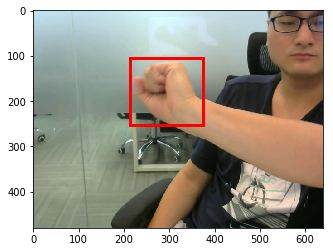

In [31]:
import random
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline 

id = random.sample(boxes_dict.keys(), 1)[0]
image = Image.open('./Homemade_Hand/FULL/' + id + '.jpg')
box = boxes_dict[id]
left, top, right, bottom = box[0]
width = right - left
height = bottom - top
label = labels_dict[id]
print(label, box)

ax = plt.subplot()
ax.add_patch(patches.Rectangle((left, top), width, height, linewidth = 3, color='r', fill=False))
ax.imshow(image)
plt.show()

### 划分训练集和验证集

In [34]:
import random
random.seed(0)
val = random.sample(boxes_dict.keys(), 203)

In [35]:
s = [0 for i in range(len(class_dict)-1)]
for i in val:
    labels = labels_dict[i]
    for j in labels:
        s[j-1] += 1
print('测试集中各类样本数:')
for i in s:
    print(i)
print('测试集总数为: ', sum(s))

测试集中各类样本数:
72
65
66
测试集总数为:  203


In [36]:
# 标注划分
val_boxes_dict = {}
val_labels_dict = {}
train_boxes_dict = {}
train_labels_dict = {}
for k, v in boxes_dict.items():
    if k in val:
        val_boxes_dict[k] = v
        val_labels_dict[k] = labels_dict[k]
    else:
        train_boxes_dict[k] = v
        train_labels_dict[k] = labels_dict[k]

In [37]:
print(len(val_boxes_dict), len(val_labels_dict))

203 203


In [38]:
print(len(train_boxes_dict), len(train_labels_dict))

0 0


In [ ]:
# 将对应图片复制到指定目录
import os
from shutil import copyfile
from tqdm import tqdm_notebook as tqdm

if not os.path.exists('./Homemade_Hand/train'):
    os.mkdir('./Homemade_Hand/train')
if not os.path.exists('./Homemade_Hand/val'):
    os.mkdir('./Homemade_Hand/val')

for i in tqdm(val_boxes_dict.keys()):
    src = './Homemade_Hand/FULL/' + i + '.jpg'
    dst = './Homemade_Hand/val/' + i + '.jpg'
    copyfile(src, dst)
for i in tqdm(train_boxes_dict.keys()):
    src = './Homemade_Hand/FULL/' + i + '.jpg'
    dst = './Homemade_Hand/train/' + i + '.jpg'
    copyfile(src, dst)

In [42]:
# 将标注文件存到指定目录
with open('./Homemade_Hand/train/boxes_dict.pickle', 'wb') as f:
    pickle.dump(train_boxes_dict, f)
with open('./Homemade_Hand/train/labels_dict.pickle', 'wb') as f:
    pickle.dump(train_labels_dict, f)
with open('./Homemade_Hand/val/boxes_dict.pickle', 'wb') as f:
    pickle.dump(val_boxes_dict, f)
with open('./Homemade_Hand/val/labels_dict.pickle', 'wb') as f:
    pickle.dump(val_labels_dict, f)